Подключение библиотек

In [48]:
import tensorflow as tf
from tensorflow import keras
import input_and_processing as iap

Предобработка данных

In [49]:
(train_img, train_labels), (test_img, test_labels), t_img, result_test_df = iap.my_input_and_processing()

In [50]:
train_img.shape, test_img.shape, t_img.shape

((800, 32, 32, 4), (212, 32, 32, 4), (506, 32, 32, 4))

Обучение модели CNN

In [77]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 4)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    # # keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.8),
    # # keras.layers.BatchNormalization(),

    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Dropout(0.5),
    # keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
                
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=2,
                                                 min_lr=0.1)

history = model.fit(train_img, train_labels, epochs=200, validation_data=(test_img, test_labels), callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_img, test_labels)
print('Test metric:', test_acc)

predictions = model.predict(t_img)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6968 - sparse_categorical_crossentropy: 0.6968 - val_loss: 0.6712 - val_sparse_categorical_crossentropy: 0.6705 - learning_rate: 1.0000e-04
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6647 - sparse_categorical_crossentropy: 0.6647 - val_loss: 0.6503 - val_sparse_categorical_crossentropy: 0.6507 - learning_rate: 1.0000e-04
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6801 - sparse_categorical_crossentropy: 0.6801 - val_loss: 0.6205 - val_sparse_categorical_crossentropy: 0.6214 - learning_rate: 1.0000e-04
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6630 - sparse_categorical_crossentropy: 0.6630 - val_loss: 0.5786 - val_sparse_categorical_crossentropy: 0.5801 - learning_rate: 1.0000e-04
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5850 - sparse_categorical_crossentropy: 0.5850 - val_loss: 0.5271 - val_sparse_categorical_crossentropy: 0.5297 - learning_rate: 1

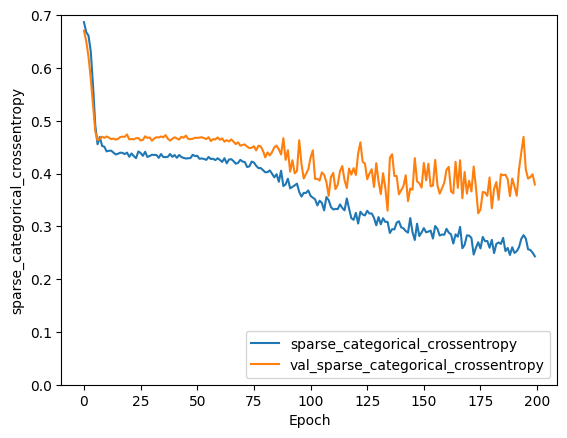

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_crossentropy'], label='sparse_categorical_crossentropy')
plt.plot(history.history['val_sparse_categorical_crossentropy'], label = 'val_sparse_categorical_crossentropy')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')

Пост-обработка данных и запись в файл .csv

In [79]:
num = 7

iap.my_output_processing(result_test_df, predictions, num)

Submission successfully saved
Submission successfully saved


1. Увеличение данных
2. Добавить регуляризацию
3. Размер батча, оптимизатор, функции активации, шаг оптимизации